In [ ]:
%tensorflow_version 2.1


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [ ]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.26.4
TensorFlow 2.18.0
Keras 3.8.0


In [ ]:

# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

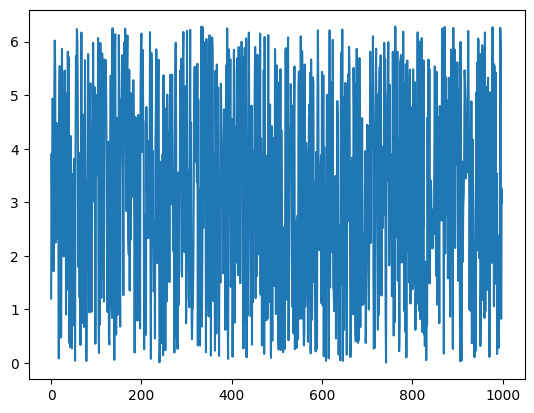

In [ ]:
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

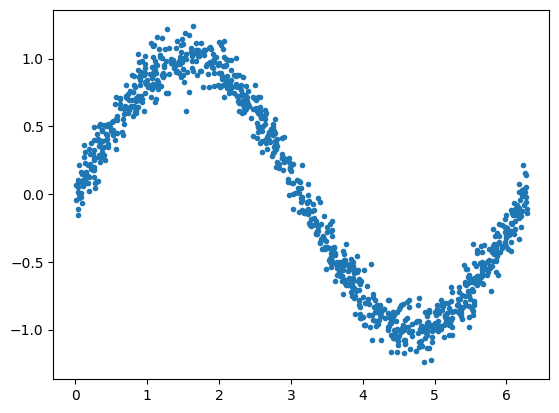

In [ ]:
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

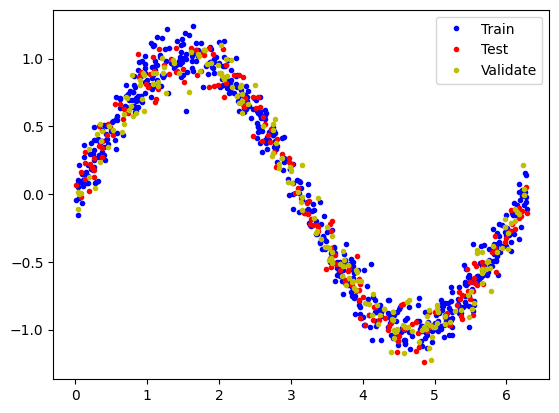

In [ ]:
# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [ ]:

# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [ ]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.7689 - mae: 1.7689 - val_loss: 1.6179 - val_mae: 1.6179
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4725 - mae: 1.4725 - val_loss: 1.4165 - val_mae: 1.4165
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2791 - mae: 1.2791 - val_loss: 1.2798 - val_mae: 1.2798
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1743 - mae: 1.1743 - val_loss: 1.1560 - val_mae: 1.1560
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0433 - mae: 1.0433 - val_loss: 1.0513 - val_mae: 1.0513
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9671 - mae: 0.9671 - val_loss: 0.9872 - val_mae: 0.9872
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9137 - mae: 0.9137 - val_loss: 0.9260 - val_mae: 0.9260
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8754 - mae: 0.8754 - val_loss: 0.8664 - val_mae: 0.8664
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8184 - mae: 

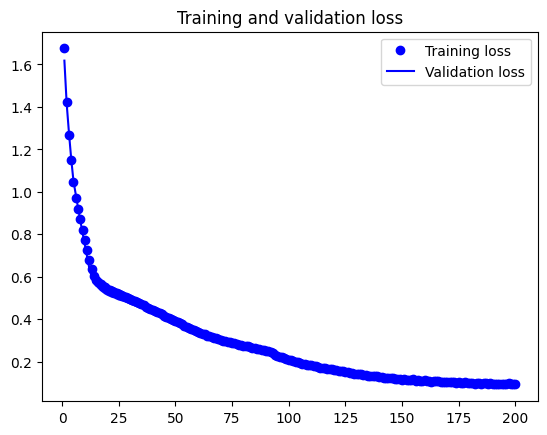

In [ ]:

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


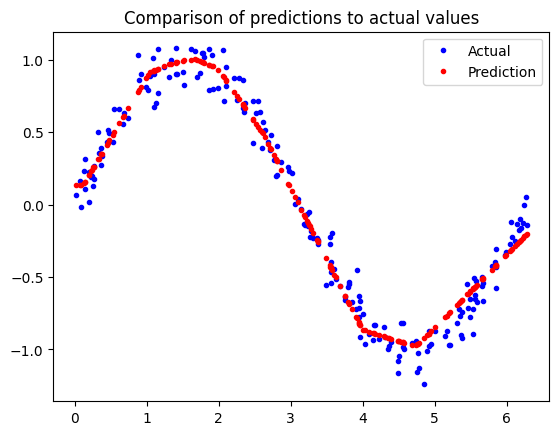

In [ ]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [ ]:

# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmp1tdjujwm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139531408547216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139531408545488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139531408546640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139531408545872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139531408547792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139531408547024: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


In [ ]:

# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))